## Convolutional Neural Network (CNN or ConvNets)

#### Download data
First we download the data here: https://www.kaggle.com/zalando-research/fashionmnist

#### Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed $x$ as $x = i \cdot 28 + j$, where $i$ and $j$ are integers between $0$ and $27$. The pixel is located on row $i$ and column $j$ of a $28 \times 28$ matrix.

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top.

#### Labels

Each training and test example is assigned to one of the following labels: 

0. T-shirt/top,  
1. Trouser,  
2. Pullover,  
3. Dress,  
4. Coat,  
5. Sandal,  
6. Shirt,  
7. Sneaker,  
8. Bag,  
9. Ankle boot 

In [ ]:
# Import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Import the data from the location on your computer
path = '/content/drive/My Drive/Course v2/B1. Machine Learning Deep Learning/B1.4 Deep Learning/Datasets/'
training_data = pd.read_csv(path + "fashion-mnist_train.csv")
testing_data = pd.read_csv(path + "fashion-mnist_test.csv")

### 1) Size of training and testing data
How many data we have in the "training_data" and "testing_data"? Use the `shape` function to have a size of the data

In [ ]:
print("training data size", ":", training_data.shape,'\n', "testing data size", ":", testing_data.shape)

training data size : (60000, 785) 
 testing data size : (10000, 785)


In [ ]:
# Converge to arrays
training_data = np.array(training_data)
testing_data = np.array(testing_data)

### 2) Data visualisation
Plot images with their labels as titles

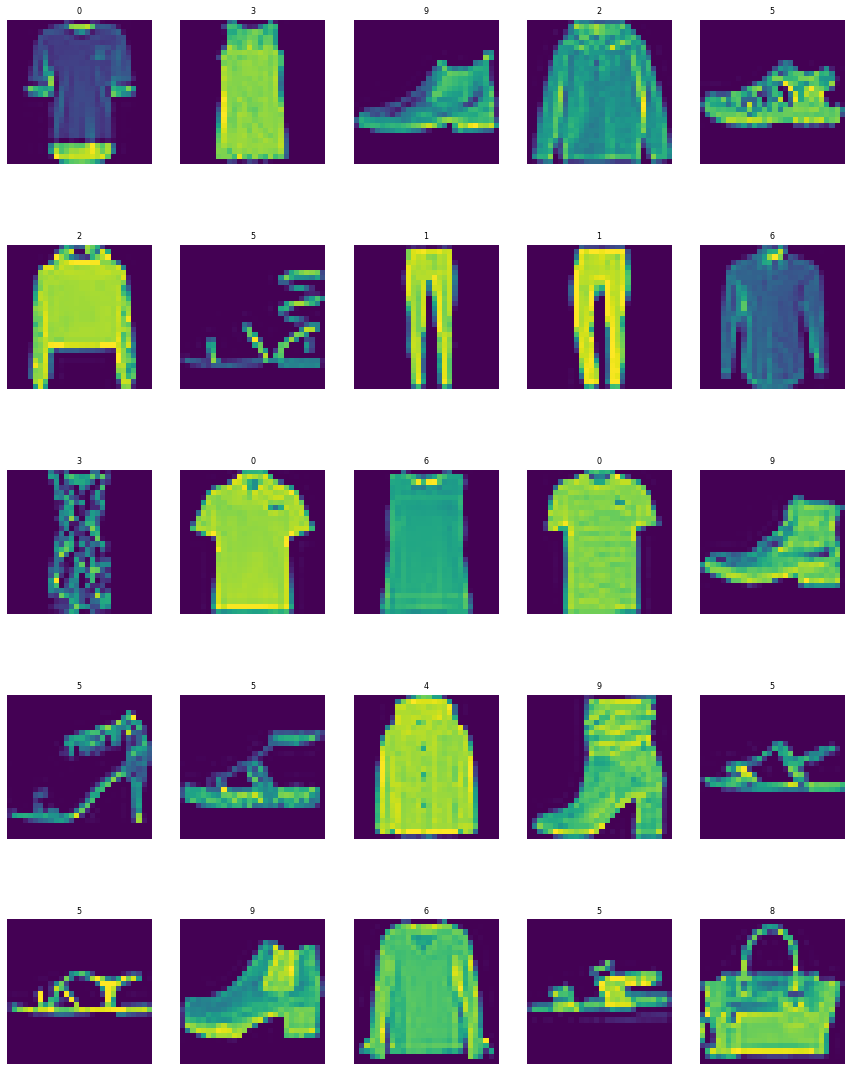

In [ ]:
# Dimensions of the plot grid 
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,20))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

number_training = len(training_data) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, number_training)
    # read and display an image with the selected index    
    axes[i].imshow( training_data[index,1:].reshape((28,28)) )
    axes[i].set_title(training_data[index,0], fontsize = 8)
    axes[i].axis('off')

###3) Prepare the data
Create input and output data, scale it so that the pixel values are between 0 and 1 - neural networks usually work better with normalized data

In [ ]:
input_train = training_data[:,1:]/255
output_train = training_data[:,0]

input_test = testing_data[:,1:]/255
output_test= testing_data[:,0]

###4) Split the train data into train and validate datasets.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

X_train, X_val, y_train, y_val = train_test_split(input_train, output_train, test_size = 0.2, random_state = 0)
X_test=input_test
y_test=output_test




print(y_train.shape)

(48000,)


In [ ]:
X_test.shape

(10000, 784)

### 5) Reshape the dataset into 4D array
2D Convolution layer of keras use input of the form: (Batch_size, image_dim_1, image_dim_2, channel_dim). Batch_size here is the number of examples. channel_dim is the number of color channels. Reshape the data into 4D array.

In [ ]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
X_val=X_val.reshape(X_val.shape[0],28,28,1)
print(X_train.shape)
print(X_val.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)


### 6) Create CNN with the following architecture:
    - 1 Input layer
    - 1 Convolution Layer with 
        - 32 filters and a kernel size of 5 
        - ReLU activations
    - Max Pooling with a kernel 2x2 and stride 2
    - 1 Convolution Layer with 64 filters and a kernel size of 3
        - 64 filters and a kernel size of 3 
        - ReLU activation
    - Max Pooling with a kernel 2x2 and stride 2
    - Flatten()
    - 1 Fully connected layer with 32 neurons
    - 1 Output layer

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [ ]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(32,5, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

#cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64,3, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
#cnn_model.add(Dense(output_dim = 10, activation = 'softmax'))
cnn_model.add(Dense(10,activation='softmax'))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  


In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)               

 ### 7) Compile the model. 
 Use this link for some tips: https://keras.io/losses/

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer="adam",metrics =['accuracy'])

 ### 8) Train the model.
 You may also use the validate data to see how it works 

In [ ]:
y_train.shape

(48000,)

In [ ]:
epochs = 5

history = cnn_model.fit(X_train, y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1, validation_data=(X_val,y_val))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  





Train on 48000 samples, validate on 12000 samples
Epoch 1/5





48000/48000 [==============================] - 15s 309us/step - loss: 0.9735 - acc: 0.6561 - val_loss: 0.5800 - val_acc: 0.7886
Epoch 2/5
48000/48000 [==============================] - 1s 18us/step - loss: 0.5412 - acc: 0.8040 - val_loss: 0.4526 - val_acc: 0.8409
Epoch 3/5
48000/48000 [==============================] - 1s 18us/step - loss: 0.4574 - acc: 0.8382 - val_loss: 0.4120 - val_acc: 0.8552
Epoch 4/5
48000/48000 [==============================] - 1s 18us/step - loss: 0.4160 - acc: 0.8516 - val_loss: 0.3819 - val_acc: 0.8660
Epoch 5/5
48000/48000 [==============================] - 1s 18us/step - loss: 0.3873 - acc: 0.8625 - val_loss: 0.3582 - val_acc: 0.8763


### 9) Evaluate the model
Use your test data for this part.

In [ ]:
input_test = input_test.reshape(input_test.shape[0], 28,28,1)
evaluation = cnn_model.evaluate(input_test, output_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 0s 49us/step
Test Accuracy : 0.878


### 10) Make a prediction from the test data

In [ ]:
predicted_classes = cnn_model.predict_classes(input_test)

###11) Visualisate again
Plot some test images with their classes and predicted clases

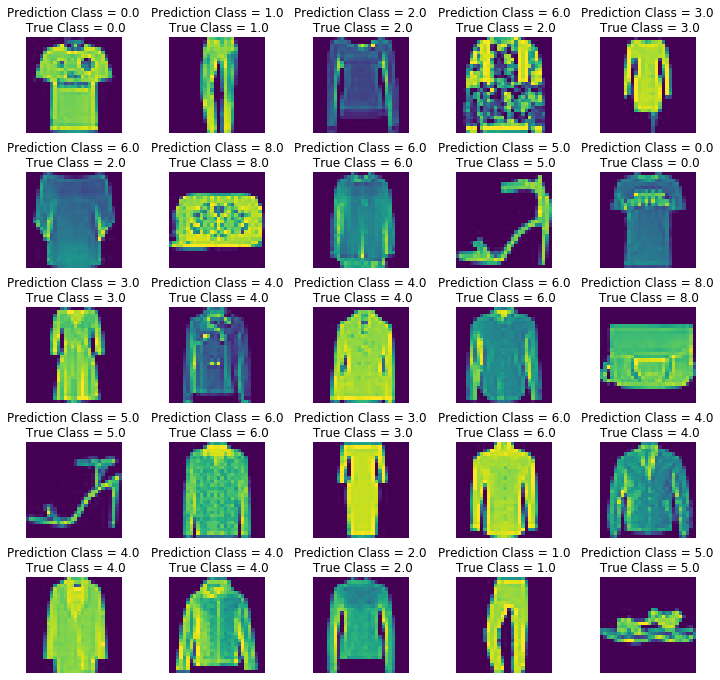

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(input_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], 
                                                                                 output_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


### 12) Make a confusion matrix

[0 1 2 ... 8 8 1]


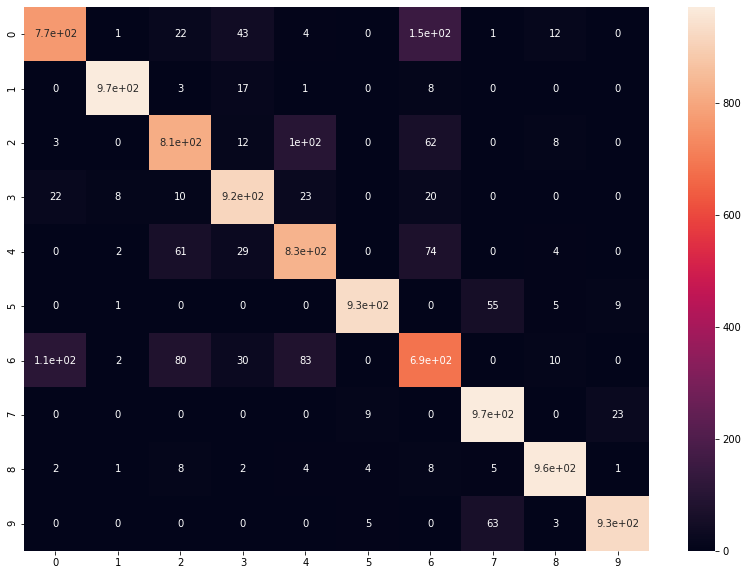

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(output_test, predicted_classes)
print(output_test)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

### 13) Display a classification report

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(output_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.77      0.81      1000
     Class 1       0.98      0.97      0.98      1000
     Class 2       0.82      0.81      0.81      1000
     Class 3       0.87      0.92      0.89      1000
     Class 4       0.79      0.83      0.81      1000
     Class 5       0.98      0.93      0.95      1000
     Class 6       0.68      0.69      0.68      1000
     Class 7       0.89      0.97      0.93      1000
     Class 8       0.96      0.96      0.96      1000
     Class 9       0.97      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### 14) Improve your model.
Use one-hot encoding for your labels and use `categorical_crossentropy` instead of `sparse_categorical_crossentropy` loss now.
Try different architecture and obtain at least 0.92 accuracy for your test data

In [ ]:
y_train_OHE = ohe.fit_transform(y_train.reshape(-1,1)).toarray()
y_test_OHE = ohe.transform(y_test.reshape(-1,1)).toarray()
y_val_OHE = ohe.transform(y_val.reshape(-1,1)).toarray()

In [ ]:
# 6) Train the model: make the architecture of the model
np.random.seed(1)
model=Sequential()
model.add(Conv2D(64, kernel_size=3,padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 3136)             

In [ ]:
opt = Adam(lr=0.001)
metrics = 'accuracy'

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history=model.fit(X_train, y_train_OHE, batch_size=512, epochs=15, validation_data=(X_val,y_val_OHE))


Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 2s 46us/step - loss: 0.8025 - acc: 0.7177 - val_loss: 0.5024 - val_acc: 0.8121
Epoch 2/15
48000/48000 [==============================] - 1s 31us/step - loss: 0.4606 - acc: 0.8337 - val_loss: 0.3962 - val_acc: 0.8582
Epoch 3/15
48000/48000 [==============================] - 1s 30us/step - loss: 0.3943 - acc: 0.8581 - val_loss: 0.3678 - val_acc: 0.8682
Epoch 4/15
48000/48000 [==============================] - 1s 31us/step - loss: 0.3584 - acc: 0.8719 - val_loss: 0.3319 - val_acc: 0.8808
Epoch 5/15
48000/48000 [==============================] - 1s 30us/step - loss: 0.3422 - acc: 0.8782 - val_loss: 0.3112 - val_acc: 0.8893
Epoch 6/15
48000/48000 [==============================] - 1s 30us/step - loss: 0.3171 - acc: 0.8871 - val_loss: 0.3062 - val_acc: 0.8894
Epoch 7/15
48000/48000 [==============================] - 1s 30us/step - loss: 0.3057 - acc: 0.8911 - val_loss: 0.2877 - val_acc

In [ ]:
model.evaluate(X_test,y_test_OHE)

10000/10000 [==============================] - 1s 54us/step


[0.22535627377033235, 0.9216]